In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
df.describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,8467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3349
mean,36.775106,NaN,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,NaN
std,13.625639,NaN,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,NaN
min,21.000000,NaN,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,NaN
25%,25.000000,NaN,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,NaN
50%,32.000000,NaN,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,NaN
75%,48.000000,NaN,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,NaN


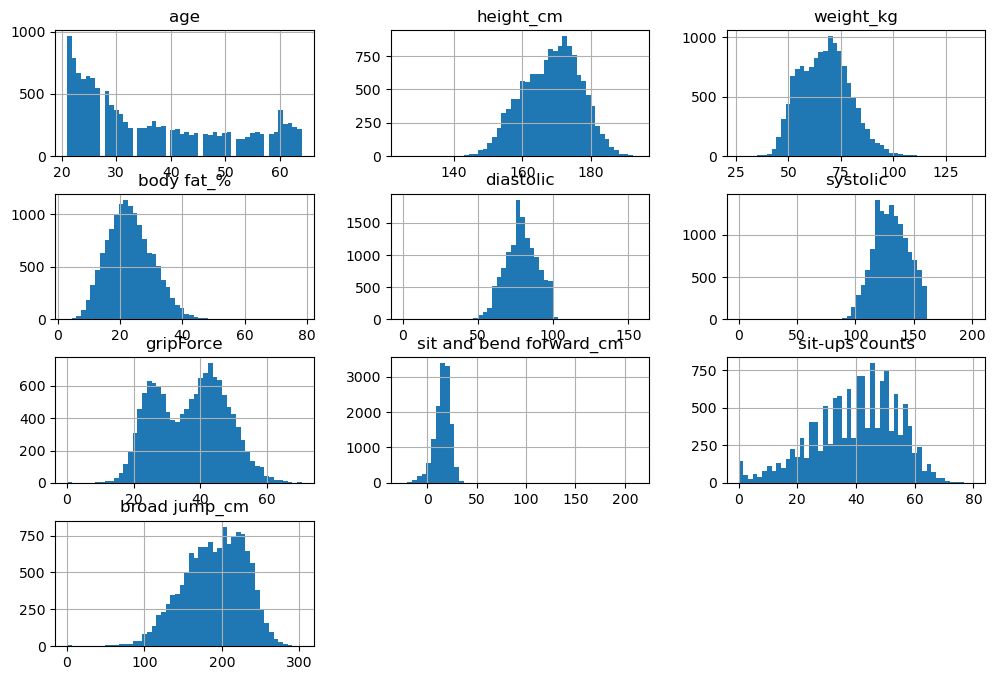

In [6]:
df.hist(bins=50, figsize=(12,8))
plt.show()

In [7]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [8]:
df['gender'].value_counts().to_dict()

{'M': 8467, 'F': 4926}

In [9]:
d1 = {'M': 1, 'F': 0}

df['gender'].replace(d1,inplace=True)

In [10]:
df['gender'][:5]

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [11]:
df = df.loc[df['class']!='D']
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [12]:
df.shape

(10044, 12)

In [13]:
df['class'].value_counts().to_dict()

{'C': 3349, 'A': 3348, 'B': 3347}

In [14]:
d2 = {'C': 2, 'A': 0, 'B': 1}
df['class'].replace(d2,inplace=True)

# Handling outliers

In [15]:
## Handling Outlier by IQR method

def get_outlier_iqr(arr):
    outlier = []
    q1= np.quantile(arr,0.25)
    q2 = np.quantile(arr,0.50)
    q3 = np.quantile(arr,0.75)
    
    IQR = q3 - q1
    print(f'{q1=} {q2=} {q3=}')
    print(f'IQR : {IQR}')
    
    lower_tail = q1-1.5*IQR
    upper_tail = q3 +1.5*IQR
    
   
    print(f'Lower Tail : {lower_tail}')
    print(f'Upper Tail : {upper_tail}')
    
    for i in arr:
        if i > upper_tail or i < lower_tail:
            # print(f'Outlier : {i}')
            outlier.append(i)
            
    return outlier,upper_tail, lower_tail


In [16]:
df.columns.tolist()

['age',
 'gender',
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm',
 'class']

In [17]:
columns_data= [
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm']

In [18]:
for i in columns_data:
    o,u,l = get_outlier_iqr(df[i])
    df[i].loc[(df[i]>u) |(df[i]<l)] = df[i].median()
    
    
    

q1=162.5 q2=169.05 q3=174.5
IQR : 12.0
Lower Tail : 144.5
Upper Tail : 192.5
q1=57.3 q2=66.2 q3=73.8
IQR : 16.5
Lower Tail : 32.55
Upper Tail : 98.55
q1=17.1 q2=21.4 q3=26.0
IQR : 8.899999999999999
Lower Tail : 3.7500000000000036
Upper Tail : 39.349999999999994
q1=71.0 q2=79.0 q3=86.0
IQR : 15.0
Lower Tail : 48.5
Upper Tail : 108.5
q1=120.0 q2=129.0 q3=140.0
IQR : 20.0
Lower Tail : 90.0
Upper Tail : 170.0
q1=28.1 q2=38.9 q3=45.9
IQR : 17.799999999999997
Lower Tail : 1.4000000000000057
Upper Tail : 72.6
q1=13.7 q2=17.8 q3=21.7
IQR : 8.0
Lower Tail : 1.6999999999999993
Upper Tail : 33.7
q1=35.0 q2=44.0 q3=52.0
IQR : 17.0
Lower Tail : 9.5
Upper Tail : 77.5
q1=168.0 q2=198.0 q3=226.0
IQR : 58.0
Lower Tail : 81.0
Upper Tail : 313.0


# Feature Scaling and Trnasfomration

#### MinmaxScalr

In [19]:
x = df.drop('class',axis=1)
y = df['class']

In [20]:
x.head(), y.head()

(    age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
 0  27.0       1      172.3      75.24        21.3       80.0     130.0   
 1  25.0       1      165.0      55.80        15.7       77.0     126.0   
 2  31.0       1      179.6      78.00        20.1       92.0     152.0   
 3  32.0       1      174.5      71.10        18.4       76.0     147.0   
 4  28.0       1      173.8      67.70        17.1       70.0     127.0   
 
    gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
 0       54.9                     18.4            60.0          217.0  
 1       36.4                     16.3            53.0          229.0  
 2       44.8                     12.0            49.0          181.0  
 3       41.4                     15.2            53.0          219.0  
 4       43.5                     27.1            45.0          217.0  ,
 0    2
 1    0
 2    2
 3    1
 4    1
 Name: class, dtype: int64)

In [21]:
min_max_scalar = MinMaxScaler()
x_min_max_scalar = min_max_scalar.fit_transform(x)
x_min_max_scalar = pd.DataFrame(x_min_max_scalar, columns=x.columns)
x_min_max_scalar.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.139535,1.0,0.587738,0.637129,0.490085,0.534483,0.5000,0.771930,0.517685,0.757576,0.612613
1,0.093023,1.0,0.433404,0.333853,0.331445,0.482759,0.4500,0.501462,0.450161,0.651515,0.666667
2,0.232558,1.0,0.742072,0.680187,0.456091,0.741379,0.7750,0.624269,0.311897,0.590909,0.450450
3,0.255814,1.0,0.634249,0.572543,0.407932,0.465517,0.7125,0.574561,0.414791,0.651515,0.621622
4,0.162791,1.0,0.619450,0.519501,0.371105,0.362069,0.4625,0.605263,0.797428,0.530303,0.612613


### Standard_scalar

In [34]:
std_scalar = StandardScaler()
x_std_scalar = std_scalar.fit_transform(x)
x_std_scalar = pd.DataFrame(x_std_scalar, columns=x.columns)
x_std_scalar.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.691385,0.776984,0.459941,0.871564,-0.062585,0.151948,0.005875,1.633504,0.127233,1.378273,0.570153
1,-0.839318,0.776984,-0.435537,-0.939964,-0.934406,-0.137636,-0.274110,-0.124541,-0.239549,0.805193,0.891984
2,-0.395519,0.776984,1.355420,1.128756,-0.249404,1.310288,1.545791,0.673706,-0.990580,0.477718,-0.395342
3,-0.321552,0.776984,0.729812,0.485776,-0.514064,-0.234165,1.195810,0.350606,-0.431673,0.805193,0.623791
4,-0.617418,0.776984,0.643944,0.168945,-0.716451,-0.813335,-0.204114,0.550168,1.646761,0.150244,0.570153


# Feature Selection

## By filter Method

<Axes: >

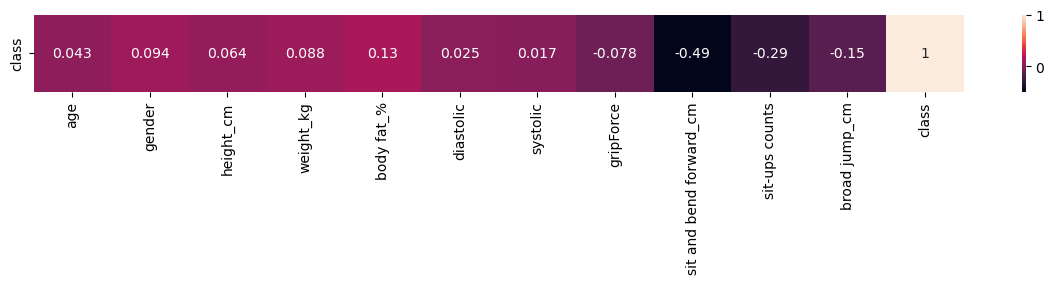

In [23]:
plt.figure(figsize = (15,1))
sns.heatmap(df.corr().tail(1), annot= True)

In [24]:
mutual_info_classif(x,y)

array([0.01390614, 0.        , 0.00405135, 0.00144987, 0.01889329,
       0.        , 0.00747009, 0.02796798, 0.18393988, 0.0469867 ,
       0.0246323 ])

In [25]:
arr = mutual_info_classif(x,y)
s1 = pd.Series(arr,index=x.columns)

In [26]:
s1.sort_values()

weight_kg                  0.000000
diastolic                  0.000000
systolic                   0.000000
age                        0.002079
height_cm                  0.006412
gender                     0.007684
body fat_%                 0.017767
gripForce                  0.026409
broad jump_cm              0.031935
sit-ups counts             0.050350
sit and bend forward_cm    0.181632
dtype: float64

In [27]:
arr2 = mutual_info_classif(x_min_max_scalar,y)
s2 = pd.Series(arr,index=x.columns)
s2.sort_values()

weight_kg                  0.000000
diastolic                  0.000000
systolic                   0.000000
age                        0.002079
height_cm                  0.006412
gender                     0.007684
body fat_%                 0.017767
gripForce                  0.026409
broad jump_cm              0.031935
sit-ups counts             0.050350
sit and bend forward_cm    0.181632
dtype: float64

In [28]:
arr3 = mutual_info_classif(x_std_scalar,y)
s3 = pd.Series(arr,index=x.columns)
s3.sort_values()

weight_kg                  0.000000
diastolic                  0.000000
systolic                   0.000000
age                        0.002079
height_cm                  0.006412
gender                     0.007684
body fat_%                 0.017767
gripForce                  0.026409
broad jump_cm              0.031935
sit-ups counts             0.050350
sit and bend forward_cm    0.181632
dtype: float64

In [29]:
x.columns.tolist()

['age',
 'gender',
 'height_cm',
 'weight_kg',
 'body fat_%',
 'diastolic',
 'systolic',
 'gripForce',
 'sit and bend forward_cm',
 'sit-ups counts',
 'broad jump_cm']

In [30]:
x_std_scalar.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

In [31]:
x_min_max_scalar = x_min_max_scalar.drop(['weight_kg','gender','diastolic'], axis=1)
x_min_max_scalar

,age,height_cm,body fat_%,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.139535,0.587738,0.490085,0.5000,0.771930,0.517685,0.757576,0.612613
1,0.093023,0.433404,0.331445,0.4500,0.501462,0.450161,0.651515,0.666667
2,0.232558,0.742072,0.456091,0.7750,0.624269,0.311897,0.590909,0.450450
3,0.255814,0.634249,0.407932,0.7125,0.574561,0.414791,0.651515,0.621622
4,0.162791,0.619450,0.371105,0.4625,0.605263,0.797428,0.530303,0.612613
...,...,...,...,...,...,...,...,...
10039,1.000000,0.167019,0.824363,0.8500,0.312865,0.569132,0.060606,0.328829
10040,0.418605,0.632135,0.575071,0.5250,0.577485,0.311897,0.515152,0.391892
10041,0.093023,0.583510,0.345609,0.6375,0.492690,0.485531,0.560606,0.527027
10042,0.418605,0.691332,0.456091,0.5250,0.897661,0.453376,0.530303,0.666667


In [35]:
x_std_scalar = x_std_scalar.drop(['weight_kg','gender','diastolic'], axis=1)
x_std_scalar

,age,height_cm,body fat_%,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.691385,0.459941,-0.062585,0.005875,1.633504,0.127233,1.378273,0.570153
1,-0.839318,-0.435537,-0.934406,-0.274110,-0.124541,-0.239549,0.805193,0.891984
2,-0.395519,1.355420,-0.249404,1.545791,0.673706,-0.990580,0.477718,-0.395342
3,-0.321552,0.729812,-0.514064,1.195810,0.350606,-0.431673,0.805193,0.623791
4,-0.617418,0.643944,-0.716451,-0.204114,0.550168,1.646761,0.150244,0.570153
...,...,...,...,...,...,...,...,...
10039,2.045375,-1.981158,1.774465,1.965769,-1.350421,0.406687,-2.387682,-1.119462
10040,0.196213,0.717545,0.404461,0.145867,0.369612,-0.990580,0.068375,-0.743992
10041,-0.839318,0.435408,-0.856565,0.775833,-0.181559,-0.047425,0.313981,0.060586
10042,0.196213,1.061016,-0.249404,0.145867,2.450757,-0.222083,0.150244,0.891984


# Model Training



#### Split data into train and test set

In [36]:
x_min_train, x_min_test, y_min_train, y_min_test  = train_test_split(x_min_max_scalar,y, test_size=0.25, random_state=54)
x_min_train.shape, x_min_test.shape, y_min_train.shape, y_min_test.shape

((7533, 8), (2511, 8), (7533,), (2511,))

In [37]:
Model = LogisticRegression(random_state=17)
Model.fit(x_min_train,y_min_train)

LogisticRegression(random_state=17)

In [39]:
## Model Evaluation
def model_eval(model,x,y):
    y_pred  = model.predict(x)
    
    print(f'Accuracy score : {accuracy_score(y,y_pred)}')
    print(f'Confusion Matrix : \n{confusion_matrix(y,y_pred)}')
    print(f'Classification report : \n{classification_report(y,y_pred)}')
    return 'Success'

In [40]:
model_eval(Model,x_min_train,y_min_train)

Accuracy score : 0.6000265498473384
Confusion Matrix : 
[[1762  651   76]
 [ 654 1016  841]
 [ 306  485 1742]]
Classification report : 
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      2489
           1       0.47      0.40      0.44      2511
           2       0.66      0.69      0.67      2533

    accuracy                           0.60      7533
   macro avg       0.59      0.60      0.59      7533
weighted avg       0.59      0.60      0.59      7533



'Success'

In [43]:
model_eval(Model,x_min_test,y_min_test)

Accuracy score : 0.5953803265631222
Confusion Matrix : 
[[618 216  25]
 [240 313 283]
 [102 150 564]]
Classification report : 
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       859
           1       0.46      0.37      0.41       836
           2       0.65      0.69      0.67       816

    accuracy                           0.60      2511
   macro avg       0.58      0.60      0.59      2511
weighted avg       0.58      0.60      0.59      2511



'Success'

###  Hyper parameter Tuning

In [ ]:
LogisticRegression()

# On standard Scalar

In [44]:
x_train, x_test, y_train, y_test  = train_test_split(x_std_scalar,y, test_size=0.25, random_state=54)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7533, 8), (2511, 8), (7533,), (2511,))

In [45]:
Model = LogisticRegression()
Model.fit(x_train,y_train)

LogisticRegression()

In [46]:
model_eval(Model,x_train,y_train)

Accuracy score : 0.6020177883977167
Confusion Matrix : 
[[1759  655   75]
 [ 642 1037  832]
 [ 299  495 1739]]
Classification report : 
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      2489
           1       0.47      0.41      0.44      2511
           2       0.66      0.69      0.67      2533

    accuracy                           0.60      7533
   macro avg       0.59      0.60      0.60      7533
weighted avg       0.59      0.60      0.60      7533



'Success'

In [47]:
model_eval(Model,x_test,y_test)

Accuracy score : 0.5985663082437276
Confusion Matrix : 
[[616 219  24]
 [239 324 273]
 [101 152 563]]
Classification report : 
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       859
           1       0.47      0.39      0.42       836
           2       0.65      0.69      0.67       816

    accuracy                           0.60      2511
   macro avg       0.59      0.60      0.59      2511
weighted avg       0.59      0.60      0.59      2511



'Success'